In [2]:
import pandas as pd
pd.options.mode.chained_assignment = None

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import plotly.graph_objs as go
import plotly.express as px

import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

import geopandas as gpd
import folium
from folium.plugins import HeatMap

import warnings
warnings.filterwarnings('ignore')

In [3]:
import geopandas as gpd
import pandas as pd


# Path to your local GeoJSON file
geojson_file_path = '../datasets/districtes.geojson'  # Update this with your actual file path

# Read the GeoJSON file into a GeoDataFrame
gdf = gpd.read_file(geojson_file_path)

# Check the structure of your data to ensure you're using the correct column names
# This will show the first few rows of your GeoDataFrame
print(gdf.head())

# Extract centroids for each district
districts_centroids = []

# Loop through each district and calculate the centroid (center point) of the geometry
for idx, row in gdf.iterrows():
    district_name = row['NOM']  # Replace 'nom' with the actual column name for district name, if it's different
    centroid = row['geometry'].centroid  # Calculate the centroid of the district's geometry
    latitude = centroid.y
    longitude = centroid.x
    districts_centroids.append({
        'District': district_name,
        'Latitude': latitude,
        'Longitude': longitude
    })

# Convert the list of dictionaries to a pandas DataFrame
centroids_df = pd.DataFrame(districts_centroids)

# Display the resulting DataFrame with centroids
print(centroids_df)

  ID_ANNEX ANNEXDESCR ID_TEMA               TEMA_DESCR ID_CONJUNT  CONJ_DESCR  \
0       01   Grup - I    0104  Unitats Administratives     010412  Districtes   
1       01   Grup - I    0104  Unitats Administratives     010412  Districtes   
2       01   Grup - I    0104  Unitats Administratives     010412  Districtes   
3       01   Grup - I    0104  Unitats Administratives     010412  Districtes   
4       01   Grup - I    0104  Unitats Administratives     010412  Districtes   

  ID_SUBCONJ SCONJ_DESC  ID_ELEMENT          ELEM_DESCR  ... ESTIL_ID  \
0   01041201  Districte  0104120101  Límit de districte  ...        0   
1   01041201  Districte  0104120101  Límit de districte  ...        0   
2   01041201  Districte  0104120101  Límit de districte  ...        0   
3   01041201  Districte  0104120101  Límit de districte  ...        0   
4   01041201  Districte  0104120101  Límit de districte  ...        0   

  ESTIL_QGIS VALOR1QGIS VALOR2QGIS COL_FARCIT FCOL_DESCR FHEX_COLOR COL_DE

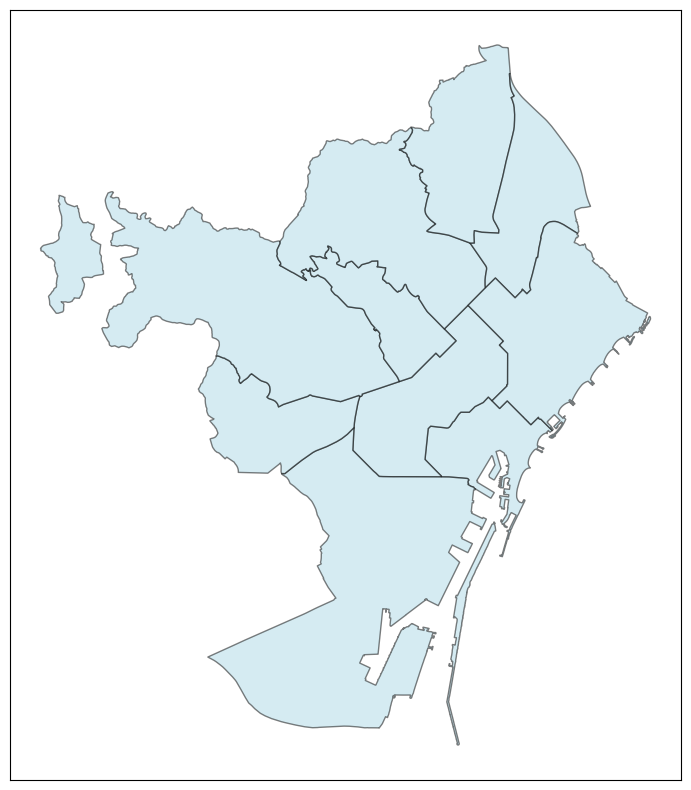

In [9]:
# Plotting the districts using GeoPandas and Matplotlib
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the map of Barcelona districts (polygon boundaries)
gdf.plot(ax=ax, color='lightblue', edgecolor='black', alpha=0.5)

# Remove axis ticks and labels (latitude and longitude)
ax.set_xticks([])  # Remove x-axis ticks (longitude)
ax.set_yticks([])  # Remove y-axis ticks (latitude)

# Save the figure as an image file
output_image_path = 'barcelona_districts_map.png'
plt.savefig(output_image_path, bbox_inches='tight', dpi=300)

# Show the plot
plt.show()